In [1]:

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import pydot
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier



In [2]:
# loading the mnist data

(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape # has 60000 rows with 28*28 matrix

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
# Flattening the Train and test data

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Scaling Pixel Values: Images are typically represented with pixel values ranging from 0 to 255 in 8-bit format. By dividing these values by 255, you scale them to a range between 0 and 1

In [8]:
x_train /= 255
x_test  /= 255

In [9]:
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

In [10]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = (28,28,1) ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))

C:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sequential()--> Initializes a Sequential model. This type of model is a linear stack of layers

MaxPooling2D: Adds a max pooling layer, which performs down-sampling by taking the maximum   value in a 2x2 pixel window.

Flatten: Flattens the 2D feature maps into a 1D vector. This is necessary to feed the output of the convolutional and pooling layers into the fully connected (dense) layers.

activation=tf.nn.softmax: Applies the softmax activation function, which converts the output into a probability distribution over the 10 classes.
 

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         605,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 607,394 (2.32 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x = x_train, y = y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8965 - loss: 0.3512
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9733 - loss: 0.0877
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9818 - loss: 0.0559
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9859 - loss: 0.0448
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9889 - loss: 0.0322
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9912 - loss: 0.0272
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9914 - loss: 0.0251
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9931 - loss: 0.0219
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9936 - loss: 0.0191
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9942 - loss: 0.0172


In [14]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9805 - loss: 0.0768


[0.06004270166158676, 0.984499990940094]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6


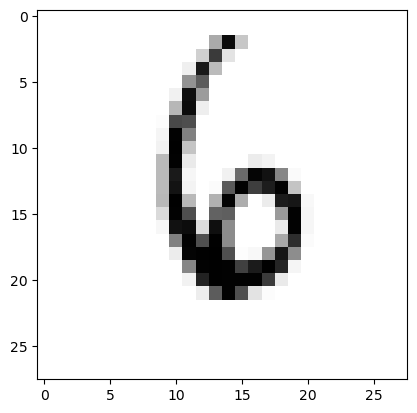

In [15]:
image_index = 6900
plt.imshow(x_test[image_index].reshape(28,28),cmap = 'Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())


# Confusion Matrix

In [16]:
# prediction

y_predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [17]:
y_predict

array([[2.68651089e-15, 8.42575271e-18, 2.07768195e-11, ...,
        1.00000000e+00, 4.22752680e-13, 9.33651600e-10],
       [1.36095892e-11, 6.81091517e-10, 1.00000000e+00, ...,
        7.72824119e-20, 2.75621251e-14, 2.21505656e-20],
       [4.06893405e-13, 9.99998689e-01, 2.43783749e-09, ...,
        2.65232615e-07, 1.04988510e-06, 3.74958328e-11],
       ...,
       [1.12778069e-21, 1.12611475e-17, 9.92394968e-18, ...,
        1.25463112e-10, 3.24542032e-10, 3.52831400e-08],
       [3.43202371e-16, 1.25851659e-17, 3.20277845e-19, ...,
        2.22992210e-17, 8.06291922e-09, 6.12775027e-16],
       [1.30496183e-10, 8.45091089e-19, 1.21990149e-06, ...,
        4.52748221e-21, 7.54194103e-12, 2.17447283e-14]], dtype=float32)

In [18]:
# we need to convert the results to a more readable format

y_predict = np.argmax(y_predict, axis = 1) # gives the index of the max value (the predicted number)

In [19]:
y_predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
# test data
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [21]:
# confusion matrix

con_matrix = confusion_matrix(y_test,y_predict)

In [22]:
con_matrix

array([[ 971,    1,    1,    0,    0,    2,    3,    1,    1,    0],
       [   0, 1125,    2,    2,    0,    1,    3,    2,    0,    0],
       [   1,    0, 1016,    0,    1,    0,    0,    6,    7,    1],
       [   0,    0,    5,  993,    0,    3,    0,    3,    4,    2],
       [   0,    0,    1,    0,  969,    0,    1,    0,    2,    9],
       [   1,    0,    1,    4,    0,  883,    3,    0,    0,    0],
       [   8,    1,    1,    0,    5,    4,  936,    0,    3,    0],
       [   1,    0,   11,    0,    2,    0,    0, 1002,    2,   10],
       [   7,    0,    3,    1,    0,    0,    0,    2,  955,    6],
       [   2,    0,    0,    2,    5,    2,    0,    1,    2,  995]],
      dtype=int64)

Text(0.5, 1.0, 'The predicted and the Trained Value')

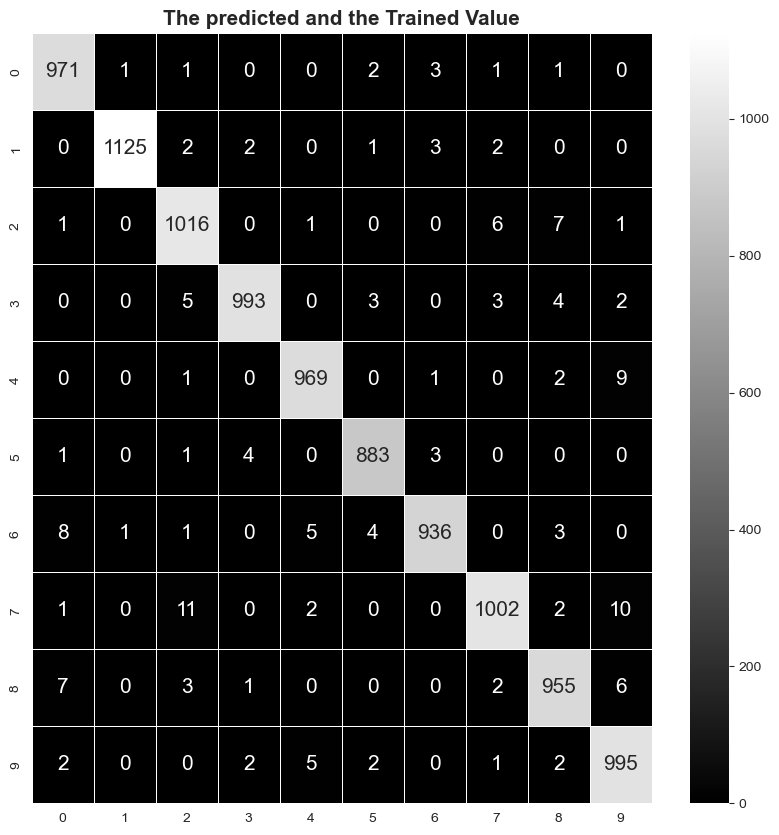

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
sns.heatmap(con_matrix, annot = True, annot_kws = {'size':15},linewidths = 0.5, fmt="d", cmap = 'grey')
plt.title("The predicted and the Trained Value",fontweight = 'bold',fontsize=15)


In [26]:
print(classification_report(y_test,y_predict)) # classification report

# overall accuracy is around 98

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
y_predict_single = model.predict(x_test[[2000]])
y_predict_singles = np.argmax(y_predict_single,axis=1)
y_test_digit_eval = y_test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


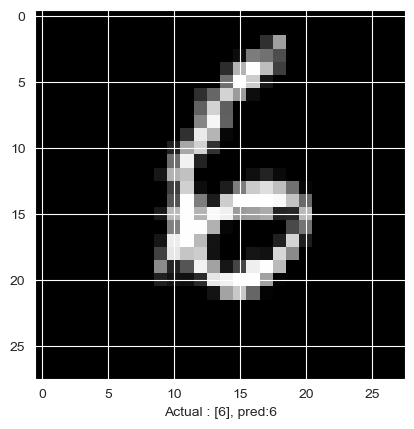

In [44]:
# Printing the predicted data and the test data

plt.imshow(x_test[2000].reshape(28,28), cmap = 'grey')
plt.xlabel("Actual : {}, pred:{}".format(y_predict_singles,y_predict_singles[0]))
plt.show()